In [1]:
import nbimporter
from ms_functions import *
%run ms_functions.ipynb
%run programs\readin.ipynb

Importing Jupyter notebook from ms_functions.ipynb


In [7]:
file = "data/proteinGroups_boost0ng_run3_simplified.txt"
msdata = readin_log(file)

### Finding Technical Replicates

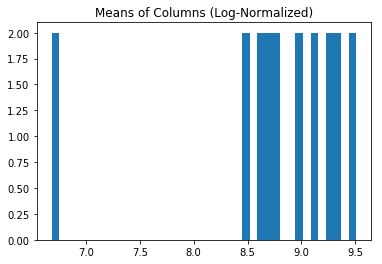

Reporter intensity corrected 1 PNNL SC boost0ng_run3     8.801097
Reporter intensity corrected 2 PNNL SC boost0ng_run3     8.476316
Reporter intensity corrected 3 PNNL SC boost0ng_run3     8.989342
Reporter intensity corrected 4 PNNL SC boost0ng_run3     9.121018
Reporter intensity corrected 5 PNNL SC boost0ng_run3     9.508843
Reporter intensity corrected 6 PNNL SC boost0ng_run3     9.234888
Reporter intensity corrected 7 PNNL SC boost0ng_run3     9.300006
Reporter intensity corrected 8 PNNL SC boost0ng_run3     8.645818
Reporter intensity corrected 9 PNNL SC boost0ng_run3     8.720256
Reporter intensity corrected 10 PNNL SC boost0ng_run3    6.681357
Reporter intensity 1 PNNL SC boost0ng_run3               8.801097
Reporter intensity 2 PNNL SC boost0ng_run3               8.476316
Reporter intensity 3 PNNL SC boost0ng_run3               8.989342
Reporter intensity 4 PNNL SC boost0ng_run3               9.121018
Reporter intensity 5 PNNL SC boost0ng_run3               9.508843
Reporter i

In [8]:
show_by_columns(msdata)

In [4]:
#print("The following measure differences between columns. Technical replicates should be lowest.")
#dif(msdata)

In [5]:
neg_col = 9
#boost_col = 9
technical_replicates = {"Cell Line 1":[3,5,6,7,8]}
###MS3###"Cell Line 1":[0,1,2],"Cell Line 2":[3,4,5],"Cell Line 3":[6,8]
###MS3 Uncorrectedc###"Cell Line 1":[10,11,12],"Cell Line 2":[13,14,15],"Cell Line 3":[16,18]
###SET1 - Fig 1###"Slavov Jurkat":[1,3,5,8],"Slavov U-937":[0,2,4,6]
###SET2 - Fig 1###"Slavov Jurkat":[0,2,4,6],"Slavov U-937":[1,3,5,8]
##SET3 - Fig 1###"Slavov Jurkat":[0,1,2,3],"Slavov U-937":[4,5,6,8]
###Fig S2###"Slavov Jurkat":[0,2,4,6],"Slavov U-937":[1,3,5,8]

### Evaluating Negative Control

In [7]:
samples = by_sample(msdata, technical_replicates)
neg_cont = msdata.iloc[:,neg_col]
#boost = msdata.iloc[:,boost_col]
plot_title = "nanoWells - Neg Control vs Sample"

In [8]:
#neg_data = eval_neg_cont(file, neg_col)
#for i in neg_data: print("{0}: {1}".format(i,neg_data[i]))

In [9]:
thrs = n_thresholds(neg_cont, percents=[50.0,75.0,90.0,95.0,99.0])
thrs = thrs['with_zeros']

50.0% threshold: 1536.5
75.0% threshold: 4217.8
90.0% threshold: 12807.0
95.0% threshold: 17913.0
99.0% threshold: 76672.0

Ignoring Zeros: 
50.0% threshold: 2398.6
75.0% threshold: 5382.4
90.0% threshold: 14519.0
95.0% threshold: 21056.0
99.0% threshold: 80223.0


94.40% of neg cont is below solid line.
26.92% of sample data is above the solid line.


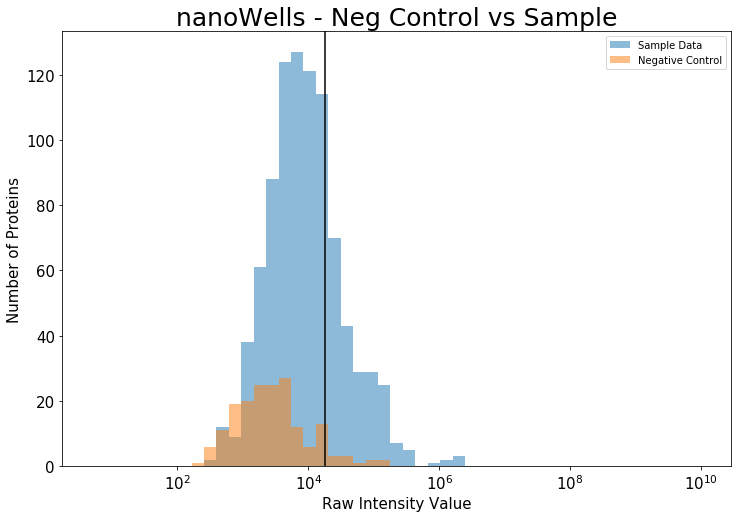

In [10]:
graph_neg_vs_samples(samples, neg_cont, title=plot_title, threshold=thrs[95])

50.00% control & 92.75% sample are above 1536.5
25.00% control & 71.21% sample are above 4217.8
10.34% control & 36.59% sample are above 12807.0
5.17% control & 26.92% sample are above 17913.0
1.29% control & 7.69% sample are above 76672.0


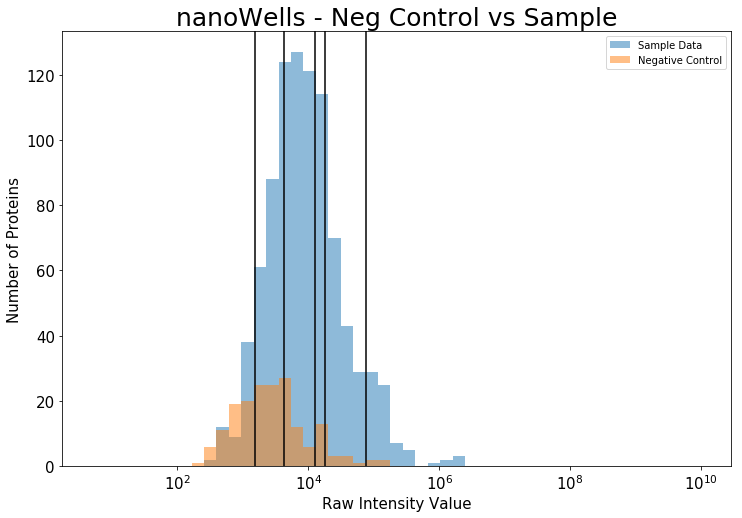

In [11]:
graph_neg_vs_samples(samples, neg_cont, title=plot_title, threshold_list = thrs.values())

In [11]:
break

SyntaxError: 'break' outside loop (<ipython-input-11-6aaf1f276005>, line 4)

In [ ]:
#graphed_types(samples, neg_cont, boost)#, sample_percent = 15)#threshold=(neg_data['ave_zero_raw']))
#zeros_by_type(samples, neg_cont, boost)

### Get Fold Change Threshold by Standard Deviations

In [ ]:
fold_change_threshold = calc_fold_threshold(msdata, technical_replicates)
print (fold_change_threshold)

In [ ]:
msdata_log = readin_log(file)
stdevs = get_tech_st_devs(msdata_log, technical_replicates)
plt.rc('axes', titlesize=20)
fig = plt.figure(figsize=(7,5))
plt.hist([x[2] for x in stdevs], bins=200)
plt.title("Standard Deviations for Technical Replicates")
plt.show()
get_thresholds([x[2] for x in stdevs])

### Volcano Plots

In [ ]:
samples = by_sample(msdata_log, technical_replicates)
fc_v = get_t_stats(samples,#approxZero = neg_data["ave_zero_log"],
                  #min_threshold=neg_data["log_min_threshold_raw"],
                   report_cat=True)

graph_all_volcanoes(fc_v["fold_changes"], fc_v["t_stats"], 
                    list(technical_replicates.keys()),
                    #fold_change_threshold=fold_change_threshold,
                    fold_change_threshold=1.25,
                    approxZero = neg_data["ave_zero_log"])